# Objetivos deste trabalho
- Familiarizar-se com a biblioteca PyTorch
- Definir arquiteturas MLP simples em PyTorch
- Treinar utilizando CIFAR10, testando diferentes arquiteturas, parâmetros, funções de loss e otimizadores
- Comparar os resultados obtidos utilizando apenas Perpceptrons

In [0]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

from sklearn.model_selection import train_test_split

In [20]:
# Carregar os datasets

transform=transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [21]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.3)


In [0]:
# Tentativa de dividir dataset em train e validation
#x_dataset = []
#y_dataset = []

#for img, label in dataset_train:
#    x_dataset.append(img)
#    y_dataset.append(label)

#x_train, x_validation = train_test_split(x_dataset, train_size=35000)
#y_train, y_validation = train_test_split(y_dataset, train_size=35000)

#train_dataset = zip(x_train, y_train)
#validation_dataset = zip(x_validation, y_validation)

In [0]:
train_loader = DataLoader(dataset=dataset_train, batch_size=200, shuffle=True)
#validation_loader = DataLoader(dataset=validation_dataset, shuffle=False)
test_loader = DataLoader(dataset=dataset_test, shuffle=False)

In [0]:
# Definir a arquitetura MLP

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32*32, 50)
        self.fc2 = nn.Linear(50, 20)
        self.fc3 = nn.Linear(20, 10)
        self.activation_function = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 32*32)
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.activation_function(self.fc3(x))
        return x

In [25]:
model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=1024, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
  (activation_function): ReLU()
)


In [0]:
# Definir otimizador e loss
# Nota: testar outros otimizadores e funções de loss (em particular cross entropy)

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

In [36]:
# Realizar o treinamento aqui

losses = []
for epoch in range(400):
    correct = 0
    total = 0
    model.train()
    for i, (inputs, labels) in enumerate(train_loader, 0):
        if(i <= 150):
            optimizer.zero_grad()
        
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            losses.append(loss)
            loss.backward()
            optimizer.step()

        else:
            model.eval()
            
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
        
            _, pred = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (pred == labels).sum().item()
        
print('Acurácia total no validation: {}'.format(100 * correct / total))        

Acurácia total no validation: 48.39393939393939


In [37]:
# Avaliar o modelo aqui (no conjunto de teste)
model.eval()
total = 0
correct = 0

with torch.no_grad():
    for img, label in test_loader:    
        outputs = model(img)
        _, pred = torch.max(outputs.data, 1)
        total += label.size(0)
        correct += (pred == label).sum().item()

print('Acurácia: {}'.format(100 * correct / total))

Acurácia: 39.35


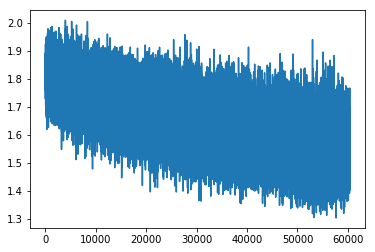

In [38]:
plt.plot(losses)
plt.show()

# Considerações
- 3 camadas se mostraram consideravelmente melhores que 2 para esse exemplo
- Aumentar o número de epochs pra mais de 400 nesse modelo atual, não faz a loss diminuir significativamente
- Batchs menores com menos epochs se mostraram bastante eficazes,  porém a melhor acurácia obtida foi com o batch = 200 e 400 epochs
- ReLU demonstrou ganhos de quase 10% em relação a sigmóide
- Para esse modelo, CrossEntropyLoss não apresentou grandes ganhos em relação a MSELoss
- A curva da loss apresentou bastante ruído em todos os testes
- Momentum não demostrou ser muito eficaz nesse exemplo, apenas melhorando em 1% ou 2% nos casos testados

